<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Конфигурация-для-подключения-к-базе-данных" data-toc-modified-id="Конфигурация-для-подключения-к-базе-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Конфигурация для подключения к базе данных</a></span></li><li><span><a href="#Задание-1" data-toc-modified-id="Задание-1-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Задание 1</a></span></li><li><span><a href="#Задание-2" data-toc-modified-id="Задание-2-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Задание 2</a></span></li><li><span><a href="#Задание-3" data-toc-modified-id="Задание-3-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Задание 3</a></span></li><li><span><a href="#Задание-4" data-toc-modified-id="Задание-4-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Задание 4</a></span></li><li><span><a href="#Задание-5" data-toc-modified-id="Задание-5-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Задание 5</a></span></li><li><span><a href="#Задание-6" data-toc-modified-id="Задание-6-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Задание 6</a></span></li><li><span><a href="#Задание-7" data-toc-modified-id="Задание-7-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Задание 7</a></span></li><li><span><a href="#Задание-8" data-toc-modified-id="Задание-8-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Задание 8</a></span></li><li><span><a href="#Задание-9" data-toc-modified-id="Задание-9-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Задание 9</a></span></li><li><span><a href="#Задание-10" data-toc-modified-id="Задание-10-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Задание 10</a></span></li></ul></div>

Данный проект был выполнен для проверки результатов изучения оконных функция в PostgreSQL. Для выполнения задания необходимо было подключиться к базе данных, выполнить запросы и ответить на вопросы по результатам сформированных таблиц. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine 
from yaml import load, FullLoader

### Конфигурация для подключения к базе данных

In [2]:
with open('config.yaml') as f:
    config = load(f, Loader=FullLoader)

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    config['database']['user'],
    config['database']['pwd'],
    config['database']['host'],
    config['database']['port'],
    config['database']['db'],
)

Создание подключения

In [3]:
engine = create_engine(connection_string) 

Тестовый запрос к базе данных

In [4]:
query = '''
SELECT *
FROM stackoverflow.users
LIMIT 10;
'''

sample_df = pd.read_sql_query(query, con=engine) 

In [5]:
sample_df

,id,creation_date,display_name,last_access_date,location,reputation,views
0,1,2008-07-31 14:22:31,Jeff Atwood,2018-08-29 02:34:23,"El Cerrito, CA",44300,408587
1,2,2008-07-31 14:22:31,Geoff Dalgas,2018-08-23 17:31:56,"Corvallis, OR",3491,23966
2,3,2008-07-31 14:22:31,Jarrod Dixon,2018-08-30 20:56:24,"Raleigh, NC, United States",13418,24396
3,4,2008-07-31 14:22:31,Joel Spolsky,2018-08-14 22:18:15,"New York, NY",28768,73755
4,5,2008-07-31 14:22:31,Jon Galloway,2018-08-29 16:48:36,"San Diego, CA",39172,11700
5,8,2008-07-31 21:33:24,Eggs McLaren,2018-04-09 02:04:56,None,942,6372
6,9,2008-07-31 21:35:27,Kevin Dente,2018-08-30 18:18:03,"Oakland, CA",14337,4949
7,11,2008-08-01 00:59:11,Anonymous User,2008-08-01 00:59:11,None,1890,2123
8,13,2008-08-01 04:18:05,Chris Jester-Young,2018-08-30 02:47:23,"Raleigh, NC, United States",177138,35414
9,17,2008-08-01 12:02:22,Nick Berardi,2018-01-22 01:35:38,"Issaquah, WA",44443,4786


### Задание 1

Выведите общую сумму просмотров постов за каждый месяц 2008 года. Если данных за какой-либо месяц в базе нет, такой месяц можно пропустить. Результат отсортируйте по убыванию общего количества просмотров.

In [6]:
query = '''
SELECT
    DATE_TRUNC('month', creation_date)::date AS month_date,
    SUM(views_count) AS total_views
FROM
    stackoverflow.posts
WHERE
    EXTRACT(YEAR FROM creation_date) = 2008
GROUP BY
    month_date
ORDER BY
    total_views DESC
'''

**Проанализируйте итоговую таблицу. Отличаются ли данные за разные месяцы? С чем могут быть связаны отличия?**

In [7]:
views_df = pd.read_sql_query(query, con=engine)

In [8]:
views_df

,month_date,total_views
0,2008-09-01,452928568
1,2008-10-01,365400138
2,2008-11-01,221759651
3,2008-12-01,197792841
4,2008-08-01,131367083
5,2008-07-01,669895


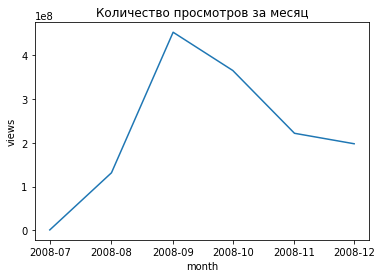

In [9]:
ax = sns.lineplot(x="month_date", y="total_views", data=views_df)
ax.set(xlabel='month', ylabel='views')
plt.title("Количество просмотров за месяц", size=12)
plt.show()

На графике заметен резкий рост в сентябре 2008 г., а затем снижение просмотров. Причиной могла стать, например, какая-либо новая функция или апргрейд, в работе которых пользователи пытались разобраться.

### Задание 2

Выведите имена самых активных пользователей, которые в первый месяц после регистрации (включая день регистрации) дали больше 100 ответов. Вопросы, которые задавали пользователи, не учитывайте. Для каждого имени пользователя выведите количество уникальных значений `user_id`. Отсортируйте результат по полю с именами в лексикографическом порядке.

In [10]:
query = '''
SELECT
    u.display_name,
    COUNT(DISTINCT u.id)
FROM
    stackoverflow.posts p
    JOIN stackoverflow.post_types pt ON p.post_type_id = pt.id
    JOIN stackoverflow.users u ON u.id = p.user_id
WHERE
    p.creation_date <= u.creation_date + INTERVAL '1 month'
    AND type = 'Answer'
GROUP BY
    u.display_name
HAVING
    COUNT(p.id) > 100
'''

In [11]:
posts_df = pd.read_sql_query(query, con=engine)

In [12]:
posts_df

,display_name,count
0,1800 INFORMATION,1
1,Adam Bellaire,1
2,Adam Davis,1
3,Adam Liss,1
4,Alan,8
...,...,...
71,leppie,1
72,lomaxx,1
73,mattlant,1
74,paxdiablo,1


**Какие аномалии наблюдаются в данных? О чём они говорят?**

In [13]:
posts_df.sort_values(by = ['count'], ascending=False).head(10)

,display_name,count
43,Matt,29
10,Chris,29
14,Dan,21
62,Tom,19
40,Mark,16
48,Nick,16
33,Josh,16
54,Rob,15
7,Brian,15
21,Greg,12


Как можно видеть, самое большое количество пользователей указывает в качестве имени свое настоящее имя.

In [14]:
posts_df.loc[posts_df['count'] == 1]

,display_name,count
0,1800 INFORMATION,1
1,Adam Bellaire,1
2,Adam Davis,1
3,Adam Liss,1
5,Amy B,1
6,Ben Hoffstein,1
8,Cade Roux,1
9,CesarB,1
11,ConcernedOfTunbridgeWells,1
13,Dale Ragan,1


Также среди пользователей есть те, чье имя является уникальным. Для этого достаточно указать имя и фамилию полностью, что непопулярно среди пользователей, поэтому можно таким образом получить уникальное имя. Часть пользователей вообще указывают при регистрации случайный набор букв, однако их меньшинство.

### Задание 3

Выведите количество постов за 2008 год по месяцам. Отберите посты от пользователей, которые зарегистрировались в сентябре 2008 года и сделали хотя бы один пост в декабре того же года. Отсортируйте таблицу по значению месяца по убыванию.

In [15]:
query = '''
SELECT
    DATE_TRUNC('month', creation_date) AS month,
    COUNT(id)
FROM
    stackoverflow.posts
WHERE
    user_id IN ( SELECT DISTINCT
            u.id
        FROM
            stackoverflow.users u
        RIGHT JOIN stackoverflow.posts p ON u.id = p.user_id
    WHERE
        DATE_TRUNC('month', u.creation_date) = '2008-09-01'
        AND DATE_TRUNC('month', p.creation_date) = '2008-12-01')
GROUP BY
    month
ORDER BY
    month DESC

'''

In [16]:
posts_months = pd.read_sql_query(query, con=engine)

In [17]:
posts_months

,month,count
0,2008-12-01,17641
1,2008-11-01,18294
2,2008-10-01,27171
3,2008-09-01,24870
4,2008-08-01,32


**Изучите данные: есть ли в них аномалии? Предположите, почему могли появиться аномальные значения.**

Несмотря на то, что были отобраны пользователи, зарегистрировавшиеся в сентябре, имеется несколько постов от пользователей с этими id в августе. Если вывести список таких пользователей, их окажется более 50. В качестве вероятной причины можно предположить сбой в системе.

### Задание 4

Используя данные о постах, выведите несколько полей:

- идентификатор пользователя, который написал пост;
- дата создания поста;
- количество просмотров у текущего поста;
- сумму просмотров постов автора с накоплением.

Данные в таблице должны быть отсортированы по возрастанию идентификаторов пользователей, а данные об одном и том же пользователе — по возрастанию даты создания поста.

In [18]:
query = '''
SELECT
    user_id,
    creation_date,
    views_count,
    SUM(views_count) OVER (PARTITION BY user_id ORDER BY creation_date)
FROM
    stackoverflow.posts
ORDER BY
    user_id
'''

In [19]:
posts_cum = pd.read_sql_query(query, con=engine)

In [20]:
posts_cum

,user_id,creation_date,views_count,sum
0,1,2008-07-31 23:41:00,480476,480476
1,1,2008-07-31 23:55:38,136033,616509
2,1,2008-07-31 23:56:41,0,616509
3,1,2008-08-04 02:45:08,0,616509
4,1,2008-08-04 04:31:03,0,616509
...,...,...,...,...
243791,5696608,2008-12-23 16:00:37,0,2804
243792,5696608,2008-12-23 17:35:09,0,2804
243793,5696608,2008-12-24 01:02:48,0,2804
243794,5696608,2008-12-30 14:34:45,0,2804


### Задание 5

Найдите среднее количество постов пользователей в день за август 2008 года. Отберите данные о пользователях, которые опубликовали больше 120 постов за август. Дни без публикаций не учитывайте. 

Отсортируйте результат по возрастанию среднего количества постов.

In [21]:
query = '''
WITH users AS (
    SELECT
        user_id,
        DATE_TRUNC('day', creation_date)::date AS day,
        COUNT(id)
    FROM
        stackoverflow.posts
    WHERE
        user_id IN (
            SELECT
                user_id
            FROM
                stackoverflow.posts
            WHERE
                DATE_TRUNC('month', creation_date)::date = '2008-08-01'
            GROUP BY
                user_id
            HAVING
                COUNT(id) > 120)
            AND DATE_TRUNC('month', creation_date)::date = '2008-08-01'
        GROUP BY
            user_id,
            day
)
SELECT
    user_id,
    AVG(count)
FROM
    users
GROUP BY
    user_id
'''

In [22]:
users_avg = pd.read_sql_query(query, con=engine)

In [23]:
users_avg

,user_id,avg
0,116,4.777778
1,234,5.208333
2,383,7.277778
3,905,7.000000
4,91,5.681818


### Задание 6

Сколько в среднем дней в период с 1 по 7 декабря 2008 года пользователи взаимодействовали с платформой? Для каждого пользователя отберите дни, в которые он или она опубликовали хотя бы один пост. Нужно получить одно целое число. 

In [24]:
query = '''
SELECT
    ROUND(AVG(day))
FROM (
    SELECT
        user_id,
        COUNT(DISTINCT DATE_TRUNC('day', creation_date)::date) AS day
    FROM
        stackoverflow.posts
    WHERE
        DATE_TRUNC('day', creation_date)::date BETWEEN '2008-12-01' AND '2008-12-07'
    GROUP BY
        user_id
    ORDER BY
        user_id) days_cnt
'''

In [25]:
interactions = pd.read_sql_query(query, con=engine)

In [26]:
interactions

,round
0,2.0


**Проанализируйте итоговую таблицу — какие выводы можно сделать?**

Можно прийти к выводу, что за указанный срок пользователи в среднем публиковали 2 поста в день (на самом деле чуть меньше). По сравнению с предыдущим результатом количество постов в день оказалось меньше, однако сюда вошли не только самые активные пользователи, но и вообще все, публиковавшие пост в заданный временной промежуток.

### Задание 7

Выведите историю активности каждого пользователя в таком виде: идентификатор пользователя, дата публикации поста. Отсортируйте вывод по возрастанию идентификаторов пользователей, а для каждого пользователя — по возрастанию даты публикации.

Добавьте в таблицу новое поле: для каждого поста в нём будет указано название месяца предпоследней публикации пользователя относительно текущей. 

| user_id | creation_date | second_last_month |
| ------- | ------------- | ----------------- |
| 1       | 2008-07-31 23:41:00 | None |
| 1       | 2008-07-31 23:55:38 | None |
| 1       | 2008-07-31 23:56:41 | July |
| 1       | 2008-08-04 02:45:08 | July |
| 1       | 2008-08-04 04:31:03 | July |
| 1       | 2008-08-04 08:04:42 | August |
| ... | ... | ... |

In [27]:
# напишите запрос
query = '''
SELECT
    user_id,
    creation_date,
    TO_CHAR(LAG(creation_date, 2, NULL) OVER (PARTITION BY user_id ORDER BY creation_date), 'Month') AS second_last_month
FROM
    stackoverflow.posts
ORDER BY
    user_id,
    creation_date
'''

# выполните запрос

In [28]:
second_last_post = pd.read_sql_query(query, con=engine)

In [29]:
second_last_post

,user_id,creation_date,second_last_month
0,1,2008-07-31 23:41:00,None
1,1,2008-07-31 23:55:38,None
2,1,2008-07-31 23:56:41,July
3,1,2008-08-04 02:45:08,July
4,1,2008-08-04 04:31:03,July
...,...,...,...
243791,5696608,2008-12-23 16:00:37,December
243792,5696608,2008-12-23 17:35:09,December
243793,5696608,2008-12-24 01:02:48,December
243794,5696608,2008-12-30 14:34:45,December


### Задание 8

Рассчитайте аналог Retention Rate по месяцам для пользователей StackOverflow. Объедините пользователей в когорты по месяцу их первого поста. Возвращение определяйте по наличию поста в текущем месяце. 

In [30]:
query = '''
WITH profile AS (
    SELECT
        id AS user_id,
        DATE_TRUNC('month', T.start_dt) AS dt,
        COUNT(*) OVER (PARTITION BY DATE_TRUNC('month', T.start_dt)) AS cohort_users_cnt
    FROM (
        SELECT
            u1.id,
            DATE_TRUNC('month', p1.creation_date) AS creation_date,
            MIN(p1.creation_date) OVER (PARTITION BY u1.id ORDER BY p1.creation_date) AS start_dt
        FROM
            stackoverflow.users u1
            JOIN stackoverflow.posts p1 ON u1.id = p1.user_id) T
    GROUP BY
        id,
        dt
),
sessions AS (
    SELECT
        user_id,
        DATE_TRUNC('month', creation_date) AS session_date
    FROM
        stackoverflow.posts
    GROUP BY
        user_id,
        session_date
)
SELECT
    p.dt AS cohort_dt,
    s.session_date,
    COUNT(p.user_id) AS users_cnt,
    p.cohort_users_cnt,
    ROUND(COUNT(p.user_id) * 100.0 / cohort_users_cnt, 2) AS retention_rate
FROM
    profile p
    JOIN sessions s ON p.user_id = s.user_id
GROUP BY
    1,
    2,
    4;
'''

In [31]:
retention_rate = pd.read_sql_query(query, con=engine)

In [32]:
retention_rate

,cohort_dt,session_date,users_cnt,cohort_users_cnt,retention_rate
0,2008-07-01,2008-07-01,3,3,100.00
1,2008-07-01,2008-08-01,2,3,66.67
2,2008-07-01,2008-09-01,1,3,33.33
3,2008-07-01,2008-10-01,2,3,66.67
4,2008-07-01,2008-11-01,1,3,33.33
5,2008-07-01,2008-12-01,2,3,66.67
6,2008-08-01,2008-08-01,2151,2151,100.00
7,2008-08-01,2008-09-01,1571,2151,73.04
8,2008-08-01,2008-10-01,1275,2151,59.27
9,2008-08-01,2008-11-01,1050,2151,48.81


Постройте тепловую карту Retention Rate. Какие аномалии или другие необычные явления удалось выявить? Сформулируйте гипотезы о возможных причинах.

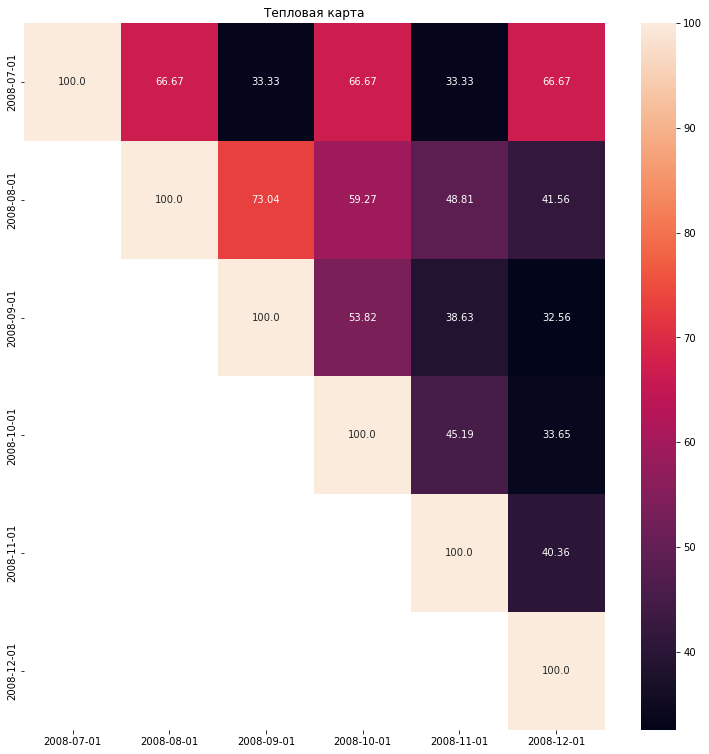

In [33]:
retention = retention_rate.pivot('cohort_dt', 'session_date', 'retention_rate')
retention.index = [str(x)[0:10] for x in retention.index]
retention.columns = [str(x)[0:10] for x in retention.columns]

plt.figure(figsize=(13, 13))
sns.heatmap(retention,
            annot=True,
            fmt='')
plt.title('Тепловая карта')
plt.show()

По тепловой карте можно заметить неравномерность возвращения пользователей на сайт. Например в первой когорте можно увидеть рост и снижение значений посещаемости, причем на симметричные значения. Также можно увидеть резкое падение retention rate для когорт от сентября, октября и ноября: в 2 и более чем в 2 раза.

Можно предположить, например, что пользователи пришли на сайт в июле в связи с каким-либо обновлением, которое впоследствии дорабатывалось, в связи с чем у пользователей вновь возникали вопросы.

Также можно предположить, что половина пользователей в сентябре, октябре и ноябре пришли с каким-либо разовым вопросом и поэтому больше не возвращались.

### Задание 9


На сколько процентов менялось количество постов ежемесячно с 1 сентября по 31 декабря 2008 года? Отобразите таблицу со следующими полями:

- номер месяца;
- количество постов за месяц;
- процент, который показывает, насколько изменилось количество постов в текущем месяце по сравнению с предыдущим.

Если постов стало меньше, значение процента должно быть отрицательным, если больше — положительным. Округлите значение процента до двух знаков после запятой.

In [34]:
query = '''
WITH posts_cnt AS (
    SELECT
        EXTRACT(month FROM creation_date)::int AS month,
        COUNT(id) AS posts_count
    FROM
        stackoverflow.posts
    WHERE
        EXTRACT(month FROM creation_date)::int BETWEEN 9 AND 12
    GROUP BY
        month
)
SELECT
    month,
    posts_count,
    ROUND(((posts_count - LAG(posts_count) OVER (ORDER BY month))::numeric / LAG(posts_count) OVER (ORDER BY month)) * 100, 2)
FROM
    posts_cnt
ORDER BY
    month
'''

In [35]:
users_percent = pd.read_sql_query(query, con=engine)

In [36]:
users_percent

,month,posts_count,round
0,9,70371,NaN
1,10,63102,-10.33
2,11,46975,-25.56
3,12,44592,-5.07


Постройте круговую диаграмму с количеством постов по месяцам.

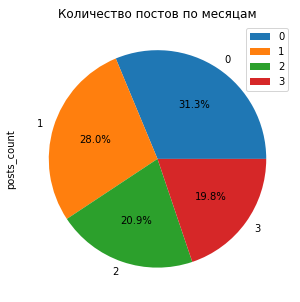

In [37]:
plot = users_percent.plot.pie(
    y='posts_count',
    title = 'Количество постов по месяцам',
    autopct='%1.1f%%',
    figsize=(5, 5)
)

### Задание 10

Выгрузите данные активности пользователя, который опубликовал больше всего постов за всё время. Выведите данные за октябрь 2008 года в таком виде:

- номер недели;
- дата и время последнего поста, опубликованного на этой неделе.

In [38]:
query = '''
WITH all_posts AS (
    SELECT
        EXTRACT(week FROM creation_date) AS week_creation,
        creation_date
    FROM
        stackoverflow.posts
    WHERE
        user_id = (
            SELECT
                user_id
            FROM
                stackoverflow.posts
            GROUP BY
                user_id
            ORDER BY
                COUNT(id) DESC
            LIMIT 1)
        AND DATE_TRUNC('month', creation_date) = '2008-10-01'
)
SELECT DISTINCT
    week_creation,
    LAST_VALUE(creation_date) OVER (PARTITION BY week_creation ORDER BY creation_date ROWS BETWEEN CURRENT ROW AND UNBOUNDED FOLLOWING)
FROM
    all_posts
ORDER BY
    week_creation
'''

In [39]:
most_active_user = pd.read_sql_query(query, con=engine)

In [40]:
most_active_user

,week_creation,last_value
0,40.0,2008-10-05 09:00:58
1,41.0,2008-10-12 21:22:23
2,42.0,2008-10-19 06:49:30
3,43.0,2008-10-26 21:44:36
4,44.0,2008-10-31 22:16:01
